# K-Nearest Neighbors (KNN) 

## Objectives:
- Understand how KNN works
- Understand why scaling is critical
- Train a KNN classifier
- Evaluate using multiple metrics
- Understand bias–variance tradeoff using K
- Understand feature importance (permutation-based)

In [39]:
%pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    silhouette_score,
    calinski_harabasz_score,
)
from sklearn.inspection import permutation_importance

## Dataset
We use the Breast Cancer dataset:
- Binary classification (Malignant / Benign)
- Continuous features
- Ideal for KNN demonstration


In [41]:
data = load_breast_cancer()

In [42]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (569, 30)
y shape: (569,)


#### general checks

In [43]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [44]:
X.head(n = 10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [45]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [46]:
X.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [47]:
X['mean radius'].mean()

np.float64(14.127291739894552)

In [48]:
def clear_data(
    data: pd.DataFrame
) -> pd.DataFrame:
    df = data.copy()
    lower = df.mean() - 3 * df.std()
    upper = df.mean() + 3 * df.std()
    mask = ((df >= lower) & (df <= upper)).all(axis=1)
    return df[mask].reset_index(drop=True)

In [49]:
data_clean = clear_data(X)

In [50]:
data_clean.shape

(495, 30)

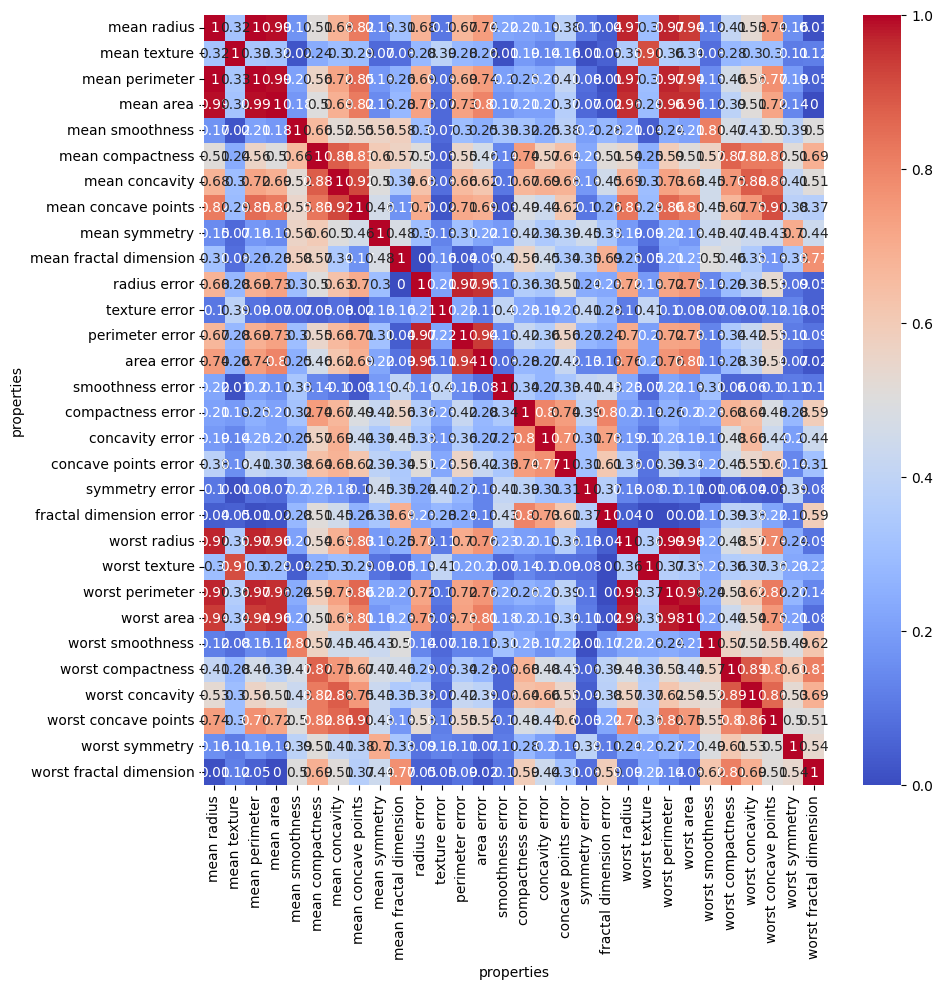

In [51]:
import seaborn as sns

correlation_matrix = X.corr().abs().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.xlabel('properties')
plt.ylabel('properties')
plt.show()

In [52]:
import gc

print("gc.isenabled() : ", gc.isenabled())
gc.collect()
print(f"no of unreachable objects : {gc.collect()}")

gc.isenabled() :  True
no of unreachable objects : 0


## Why Scaling is Mandatory for KNN

KNN uses **distance**:
Euclidean distance = √Σ(xᵢ − xⱼ)²

If one feature has a large scale, it dominates distance.
Therefore:
- KNN without scaling → incorrect neighbors
- KNN with scaling → meaningful neighbors

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size= 0.2,
    random_state= 42,
    shuffle= True,
    stratify= y
)

## KNN WITHOUT Scaling (Bad Practice)

In [54]:
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)

y_pred_raw = knn_raw.predict(X_test)
print("Accuracy without scaling:", accuracy_score(y_test, y_pred_raw))

Accuracy without scaling: 0.9122807017543859


## KNN WITH Scaling (Correct Practice)

In [55]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy with scaling:", accuracy_score(y_test, y_pred))

Accuracy with scaling: 0.956140350877193


## Evaluation Metrics
KNN is a classifier → we use classification metrics


In [56]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.956140350877193
Precision: 0.958904109589041
Recall   : 0.9722222222222222
F1 Score : 0.9655172413793104


## Confusion Matrix
Shows types of errors made by the model


In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39  3]
 [ 2 70]]


In [58]:
print(classification_report(y_test, y_pred, target_names= data.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Effect of K (Bias–Variance Tradeoff)

- Small K → low bias, high variance (overfitting)
- Large K → high bias, low variance (underfitting)


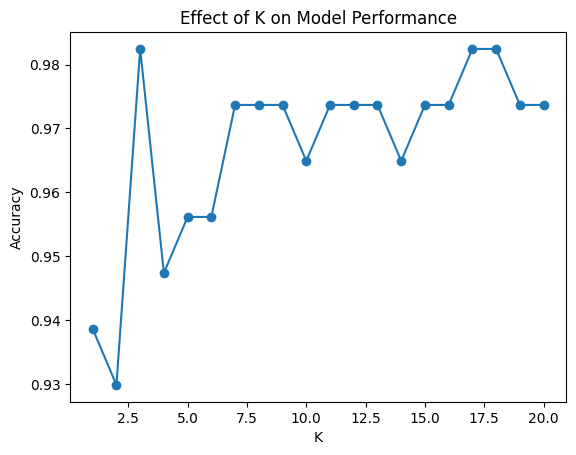

In [59]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Effect of K on Model Performance")
plt.show()


## Feature Importance in KNN

KNN:
- Learns NO parameters
- Stores data
- Uses distance only

Therefore:
- No coefficients
- No splits
- No native feature importance

## Permutation Importance (Model-Agnostic)
We measure importance by:
1. Shuffling one feature
2. Measuring drop in accuracy


In [60]:
result = permutation_importance(
    pipe,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42
)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)


,Feature,Importance
21,worst texture,0.035088
7,mean concave points,0.017544
27,worst concave points,0.017544
24,worst smoothness,0.015789
20,worst radius,0.014035
1,mean texture,0.014035
22,worst perimeter,0.014035
3,mean area,0.014035
23,worst area,0.013158
26,worst concavity,0.013158


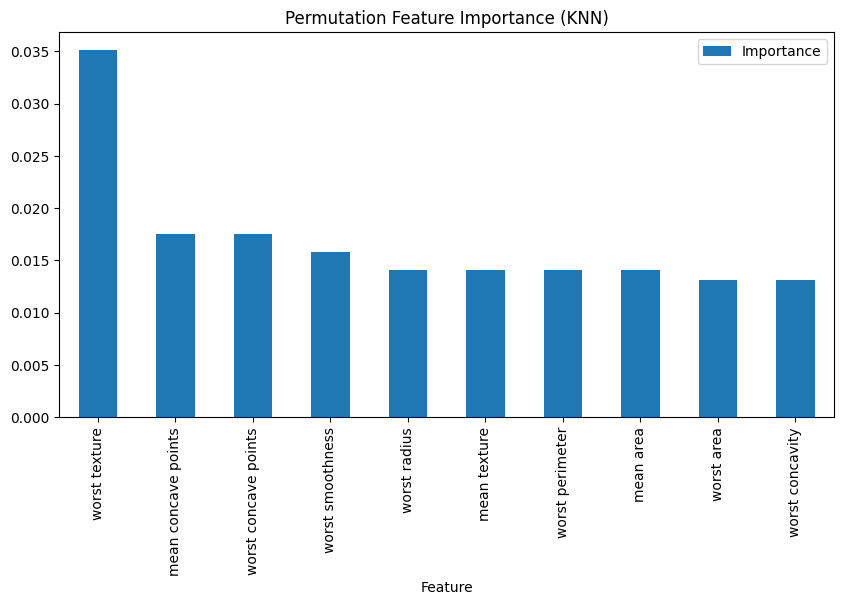

In [61]:
importance_df.head(10).set_index('Feature').plot(kind='bar', figsize=(10,5))
plt.title("Permutation Feature Importance (KNN)")
plt.show()


### Key Takeaways
- KNN is a distance-based, lazy learner
- Scaling is NOT optional
- No intrinsic feature importance
- Interpretability comes from permutation tests
- Choice of K controls bias–variance tradeoff


#### metrics

In [96]:
demo_data, _ = make_blobs(
    n_features= 500,
    centers= 4,
    cluster_std= 0.1,
    random_state= 42
)

demo_data = StandardScaler().fit_transform(demo_data)

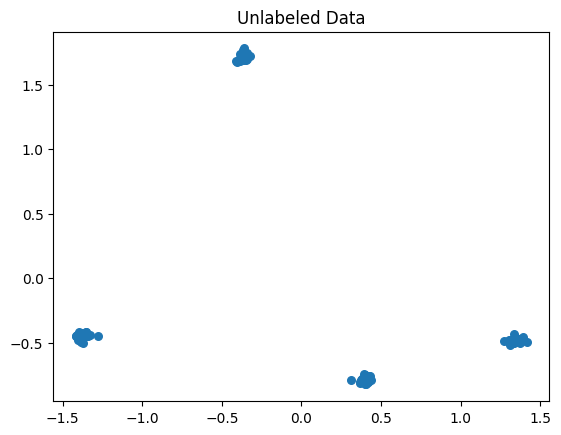

In [97]:
plt.scatter(demo_data[:,0], demo_data[:,1], s=30)
plt.title("Unlabeled Data")
plt.show()


In [104]:
kmeans = KMeans(
    n_clusters=4, 
    random_state=42,
    algorithm= 'lloyd'
)
labels = kmeans.fit_predict(demo_data)

In [ ]:
ch_index = calinski_harabasz_score(demo_data, labels)
print(f"calinski_harabasz_score :{ch_index}")

calinski_harabasz_score :42075.230563826146


In [ ]:
ks = range(2, 9)
sil_scores = []
ch_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(demo_data)
    
    # sil_scores.append(silhouette_score(demo_data, labels))
    ch_scores.append(calinski_harabasz_score(demo_data, labels))

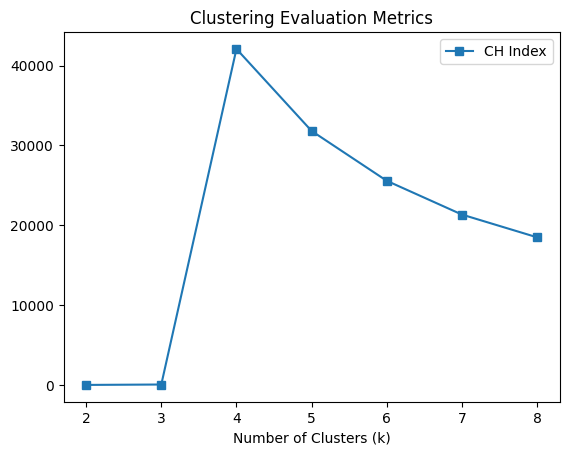

In [ ]:
# plt.plot(ks, sil_scores, marker='o', label='Silhouette')
plt.plot(ks, ch_scores, marker='s', label='CH Index')
plt.xlabel("Number of Clusters (k)")
plt.legend()
plt.title("Clustering Evaluation Metrics")
plt.show()
